In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Canny Edge detector

More formally, an edge is defined as ***discontinuities in pixel intensity***, or more simply, ***a sharp difference and change in pixel values***.

#### Canny in a nutshell
Now that we have reviewed the various types of edges in an image, let’s discuss the actual Canny edge detection algorithm, which is a multi-step process consisting of:

1. Applying Gaussian smoothing to the image to help reduce noise.
2. Computing the G_{x} and G_{y} image gradients using the Sobel kernel.
3. Applying non-maxima suppression to keep only the local maxima of gradient magnitude pixels that are pointing in the direction of the gradient.
4. Defining and applying the T_{upper} and T_{lower} thresholds for Hysteresis thresholding.


OpenCv Documentation - https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny

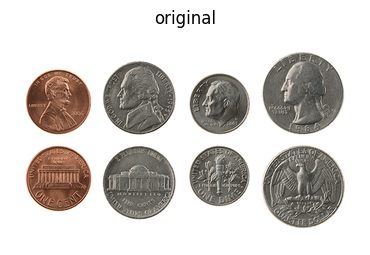

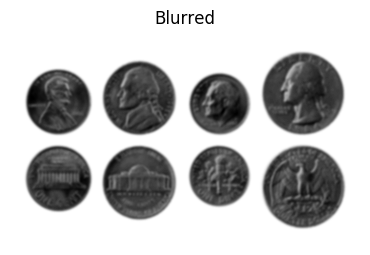

In [4]:
# edge detection

image = cv2.imread("images/coins02.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to smooth out the noice
blur = cv2.GaussianBlur(gray, (5, 5), 0)
display(image, title="original")
display(blur, flip=False, cmap="gray", title="Blurred")

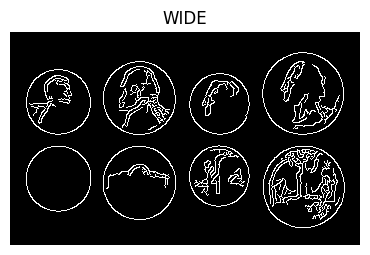

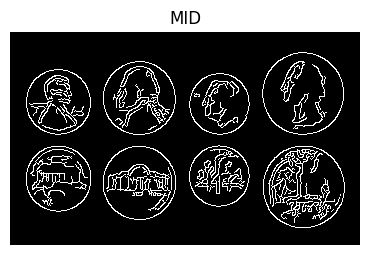

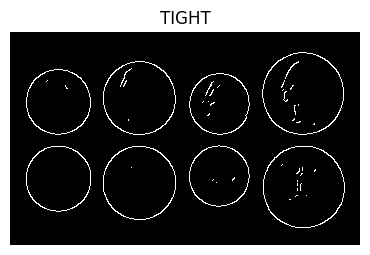

In [5]:
# compute a "wide", "mid-range", and "tight" threshold for the edges
wide = cv2.Canny(blur, 10, 200)
mid = cv2.Canny(blur, 30, 150)
tight = cv2.Canny(blur, 240, 250)

display(wide, flip=False, cmap="gray", title="WIDE")
display(mid, flip=False, cmap="gray", title="MID")
display(tight, flip=False, cmap="gray", title="TIGHT")

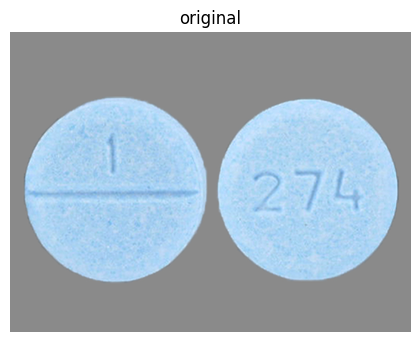

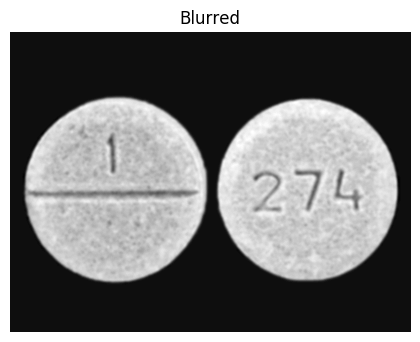

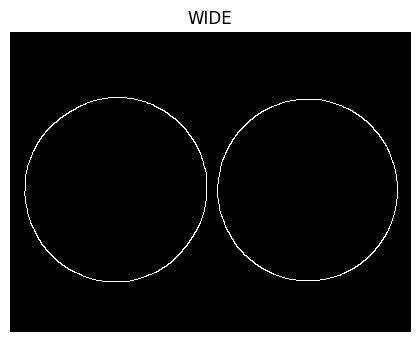

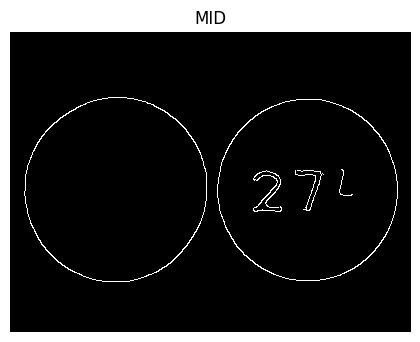

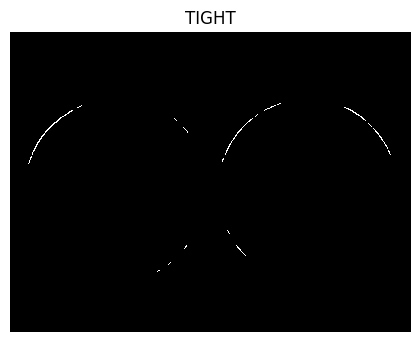

In [6]:
# another image

# edge detection

image = cv2.imread("images/clonazepam_1mg.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to smooth out the noice
blur = cv2.GaussianBlur(gray, (5, 5), 0)
display(image, title="original")
display(blur, flip=False, cmap="gray", title="Blurred")

# compute a "wide", "mid-range", and "tight" threshold for the edges
wide = cv2.Canny(blur, 10, 200)
mid = cv2.Canny(blur, 30, 150)
tight = cv2.Canny(blur, 240, 250)

display(wide, flip=False, cmap="gray", title="WIDE")
display(mid, flip=False, cmap="gray", title="MID")
display(tight, flip=False, cmap="gray", title="TIGHT")

### Automatically tuning edge detection parameters


In [7]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

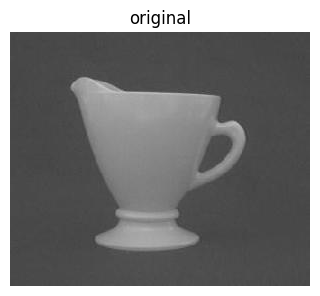

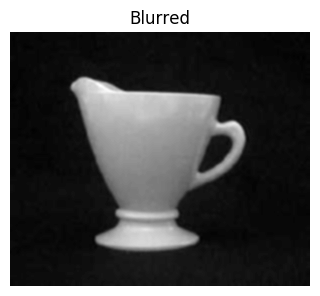

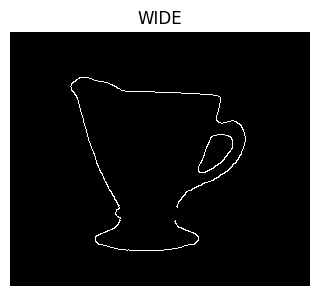

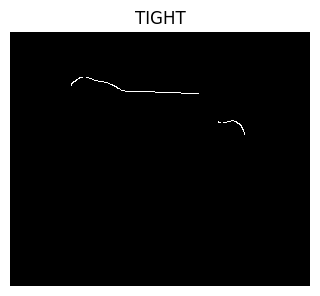

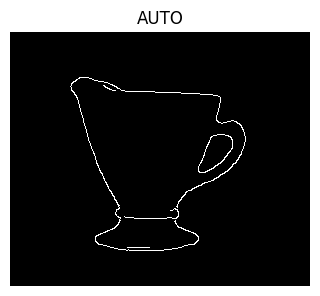

In [9]:
image = cv2.imread("images/teacup.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to smooth out the noice
blur = cv2.GaussianBlur(gray, (5, 5), 0)
display(image, title="original")
display(blur, flip=False, cmap="gray", title="Blurred")

# compute a "wide", "mid-range", and "tight" threshold for the edges
wide = cv2.Canny(blur, 10, 200)
tight = cv2.Canny(blur, 225, 250)
auto = auto_canny(blur)

display(wide, flip=False, cmap="gray", title="WIDE")
display(tight, flip=False, cmap="gray", title="TIGHT")
display(auto, flip=False, cmap="gray", title="AUTO")